In [66]:
#Importing needed packages
import pandas as pd
import os
import requests
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

%matplotlib inline
from pandas import DataFrame as df
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [67]:
#loading the CSV file
movies=pd.read_csv(r"/Users/moussaberete/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Project1/Resources/MovieData_Clean.csv")


In [68]:
#Initial look on the data
movies.head()


,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,Director,...,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release,Revenue (Millions),Runtime (Min),Primary Genre
0,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",Nick Moore,...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008,21.972336,124.0,Comedy
1,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",David E. Talbert,...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008,38.804615,96.0,Comedy
2,7191,Cloverfield,2008-01-15,25000000.0,170764026.0,tt1060277,PG-13,85 min,"Horror, Sci-Fi, Thriller",Matt Reeves,...,7.0,"358,331",22 Apr 2008,Paramount,Tuesday,January,2008,170.764026,85.0,Horror
3,13121,Teeth,2008-01-18,2000000.0,2340110.0,tt0780622,R,94 min,"Comedy, Fantasy, Horror, Thriller",Mitchell Lichtenstein,...,5.4,"39,939",06 May 2008,Roadside Attractions,Friday,January,2008,2.340110,94.0,Comedy
4,6687,Transsiberian,2008-01-18,15000000.0,5926410.0,tt0800241,R,111 min,"Crime, Drama, Mystery, Thriller",Brad Anderson,...,6.7,"48,581",04 Nov 2008,First Look,Friday,January,2008,5.926410,111.0,Crime


In [69]:
#Descriptive analysis
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 27 columns):
TMDB ID               2058 non-null int64
Title                 2058 non-null object
Release Date          2058 non-null object
Budget                2058 non-null float64
Revenue               2058 non-null float64
IMDB ID               2058 non-null object
Rating                1995 non-null object
Runtime               2055 non-null object
Genre                 2058 non-null object
Director              2055 non-null object
Writer                2031 non-null object
Actors                2056 non-null object
Plot                  2051 non-null object
Language              2058 non-null object
Country               2058 non-null object
Awards                1875 non-null object
Poster                2051 non-null object
IMDB Rating           2050 non-null float64
IMDB Votes            2050 non-null object
DVD Release Date      1937 non-null object
Production            1977 non-

In [70]:
movies.describe()

,TMDB ID,Budget,Revenue,IMDB Rating,Year of Release,Revenue (Millions),Runtime (Min)
count,2058.000000,2.058000e+03,2.058000e+03,2050.000000,2058.000000,2058.000000,2055.000000
mean,168852.050534,4.137708e+07,1.334732e+08,6.473366,2013.009232,133.473192,108.349392
std,146481.268882,5.223099e+07,2.298362e+08,0.973957,3.125539,229.836175,18.553210
min,155.000000,0.000000e+00,1.777043e+06,1.400000,2008.000000,1.777043,3.000000
25%,39303.250000,6.000000e+06,1.302367e+07,5.900000,2010.000000,13.023666,96.000000
50%,109502.000000,2.275000e+07,4.634611e+07,6.500000,2013.000000,46.346106,106.000000
75%,293977.750000,5.000000e+07,1.460240e+08,7.200000,2016.000000,146.024006,118.000000
max,597185.000000,3.800000e+08,2.787965e+09,9.000000,2018.000000,2787.965087,212.000000


In [71]:
movies.describe(include=['object'])

,Title,Release Date,IMDB ID,Rating,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Primary Genre
count,2058,2058,2058,1995,2055,2058,2055,2031,2056,2051,2058,2058,1875,2051,2050,1937,1977,2058,2058,2058
unique,2047,949,2045,5,111,563,1221,1882,2026,2038,425,413,772,2039,2029,676,358,7,12,17
top,Movie 43,2014-12-25,tt1333125,R,107 min,"Comedy, Drama, Romance",Clint Eastwood,Woody Allen,"Adam Sandler, Andy Samberg, Selena Gomez, Kevi...",This darker retelling of Alice in Wonderland f...,English,USA,1 nomination.,https://m.media-amazon.com/images/M/MV5BMjAwND...,"24,166",16 Mar 2010,Warner Bros. Pictures,Friday,December,Action
freq,2,8,2,879,63,100,10,9,3,2,1117,1041,144,2,3,9,156,1528,219,552


In [72]:
#The clean data has 3320 records with 25 variables
#There are 6 numeric and 19 non-numeric variables
#The data inclued 3291 unique Movie Titles released from 2008 to 2020 in 602 countries and 609 languages
#The budget for these movies ranged from $0 to $380 Million with revenue ranging from $1 to $2.8 Billion
#755 different movie genres, 2119 movie Directors, 2978 writers and 3250 actors are represented in the data
#The IMDB rating ranged from 1.4 to 9

#Based on the initial analysis, it will be intesrting to analyze the relationship betwen some variables and analyze factors that can predict IMDB Rating

In [73]:
# Testing the correlation between variables in the data to see if there are relationships

## Questions 1: Do movies with higher budget generate more revenue?
   #H01: There is no significant relationship between movie budget and revenue
  #Ha1: There is a signification relationship between movie budget and revenue

##Question 2: Will higher IMDB rating affect movie revenue?
  #H02: There is no significant relationship between IMDB rating and movie revenue
  #Ha2: There is a significant relationship between IMDB rating and movie revenue

# In order to answer the abive two questions, I ran pearson correlation to test the hypotheses. 

movies_sub= pd.DataFrame(movies,columns=['Revenue','Budget','IMDB Rating'])

movies_sub.corr(method='pearson')


,Revenue,Budget,IMDB Rating
Revenue,1.000000,0.775674,0.196622
Budget,0.775674,1.000000,0.106592
IMDB Rating,0.196622,0.106592,1.000000


In [74]:
## Question 1 Response: The correlaton between Budget and Revenue is positive and strong (r = +0.79)
   # Based on the correlation resul, H01 is rejected
   # This result indicates that there is a strong and positive relationship between budget and revenue
   # Movies with higher budget generate more revenue. However, this does not mean they make more profit. 
    
## Question 2 Response: The correlation between IMDB score and revenue is positve and low (r = +0.2)
  # Based on the corrlation result, H02 is accepted
  # This result indicates that the IMDB rating does have a significant impact on a movie's revenue
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a873d90>,
      dtype=object)

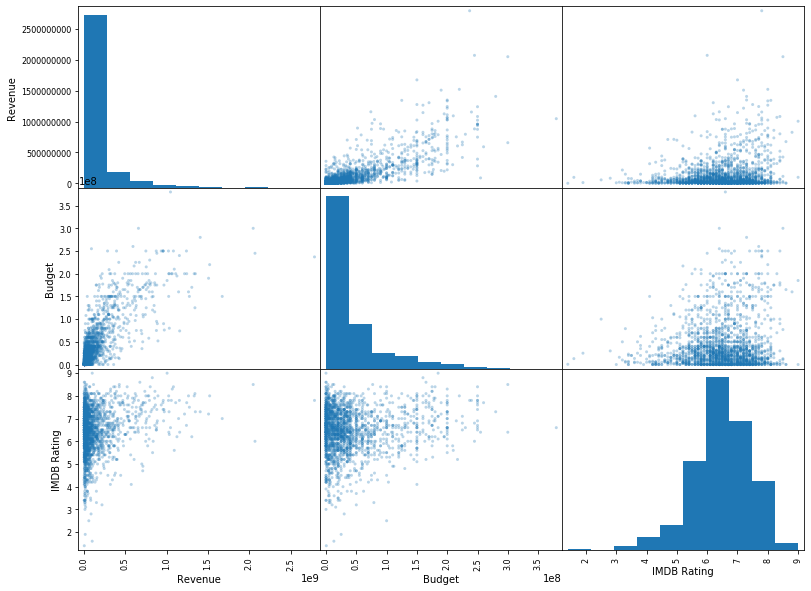

In [75]:
# Plotting the scatterplot matrix
scatter_matrix(movies_sub, figsize=(13,10), alpha=0.3)

In [76]:
#Creating subset of data for tree classification
Tree_Data= pd.DataFrame(movies,columns=['Budget','IMDB Rating','Runtime (Min)','Primary Genre','Rating','Revenue (Millions)'])
Tree_Data.columns=['Budget','IMDB_Rating','Runtime','Genre','Rating','Revenue']
Tree=Tree_Data.dropna()
Tree.head()

,Budget,IMDB_Rating,Runtime,Genre,Rating,Revenue
0,20000000.0,6.1,124.0,Comedy,PG-13,21.972336
1,0.0,4.5,96.0,Comedy,PG-13,38.804615
2,25000000.0,7.0,85.0,Horror,PG-13,170.764026
3,2000000.0,5.4,94.0,Comedy,R,2.340110
4,15000000.0,6.7,111.0,Crime,R,5.926410


In [77]:
A=Tree['IMDB_Rating'].quantile(.25)
B=Tree['IMDB_Rating'].quantile(.75)
conditions = [
   (Tree['IMDB_Rating'] <= A),
    (Tree['IMDB_Rating'] >A) & (Tree['IMDB_Rating']<=B),
    (Tree['IMDB_Rating']>B)]
choices = ['Low', 'Medium', 'High']
#Tree.loc['IMDB_Rate_Level'] = np.select(conditions, choices,default='Hight')
IMDB_Rate_Level = np.select(conditions, choices,default='Hight')
Tree['IMDB_Rate']=IMDB_Rate_Level
Tree.head()

/Users/moussaberete/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Budget,IMDB_Rating,Runtime,Genre,Rating,Revenue,IMDB_Rate
0,20000000.0,6.1,124.0,Comedy,PG-13,21.972336,Medium
1,0.0,4.5,96.0,Comedy,PG-13,38.804615,Low
2,25000000.0,7.0,85.0,Horror,PG-13,170.764026,Medium
3,2000000.0,5.4,94.0,Comedy,R,2.340110,Low
4,15000000.0,6.7,111.0,Crime,R,5.926410,Medium


In [78]:
Tree['Genre'],_ = pd.factorize(Tree['Genre'])
Tree['Rating'],_ = pd.factorize(Tree['Rating'])
#spliting the data into features and target variables
Feature=['Genre','Budget','Runtime']
X=Tree[Feature] #Feature Columns
Target=Tree.IMDB_Rate
Y=Target #Tartget Column

/Users/moussaberete/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/moussaberete/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
Tree.head()

,Budget,IMDB_Rating,Runtime,Genre,Rating,Revenue,IMDB_Rate
0,20000000.0,6.1,124.0,0,0,21.972336,Medium
1,0.0,4.5,96.0,0,0,38.804615,Low
2,25000000.0,7.0,85.0,1,0,170.764026,Medium
3,2000000.0,5.4,94.0,0,1,2.340110,Low
4,15000000.0,6.7,111.0,2,1,5.926410,Medium


In [80]:
# Spliting dataset into training set and test set
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [81]:
# Creating Decision Tree classifer object
#clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
#clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
#Y_pred = clf.predict(X_test)

In [82]:
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

In [83]:
import graphviz
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [84]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Feature,class_names=Target)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rating.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

In [64]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = Feature,class_names=Y)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rating.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found